In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot

In [2]:
# general settings
class CFG:
    data_path = './../data'
    img_dim1 = 14
    img_dim2 = 7

In [3]:
# adjust params for figs
plt.style.use('fivethirtyeight')
plt.rcParams.update({'figure.figsize': (CFG.img_dim1, CFG.img_dim2)})

In [4]:
nsw_df = pd.read_parquet(os.path.join(CFG.data_path, 'NSW', 'nsw_df.parquet'))
nsw_df.head()

,DATETIME,TOTALDEMAND,REGIONID,PREDISPATCHSEQNO,PERIODID,FORECASTDEMAND,LASTCHANGED,LOCATION,TEMPERATURE
0,2010-01-01,8038.0,NSW1,2009123018,71,7832.04,2009-12-30 12:31:49,Bankstown,23.1
1,2010-01-01,8038.0,NSW1,2009123019,70,7832.04,2009-12-30 13:01:43,Bankstown,23.1
2,2010-01-01,8038.0,NSW1,2009123020,69,7832.03,2009-12-30 13:31:36,Bankstown,23.1
3,2010-01-01,8038.0,NSW1,2009123021,68,7832.03,2009-12-30 14:01:44,Bankstown,23.1
4,2010-01-01,8038.0,NSW1,2009123022,67,7830.96,2009-12-30 14:31:35,Bankstown,23.1


## 

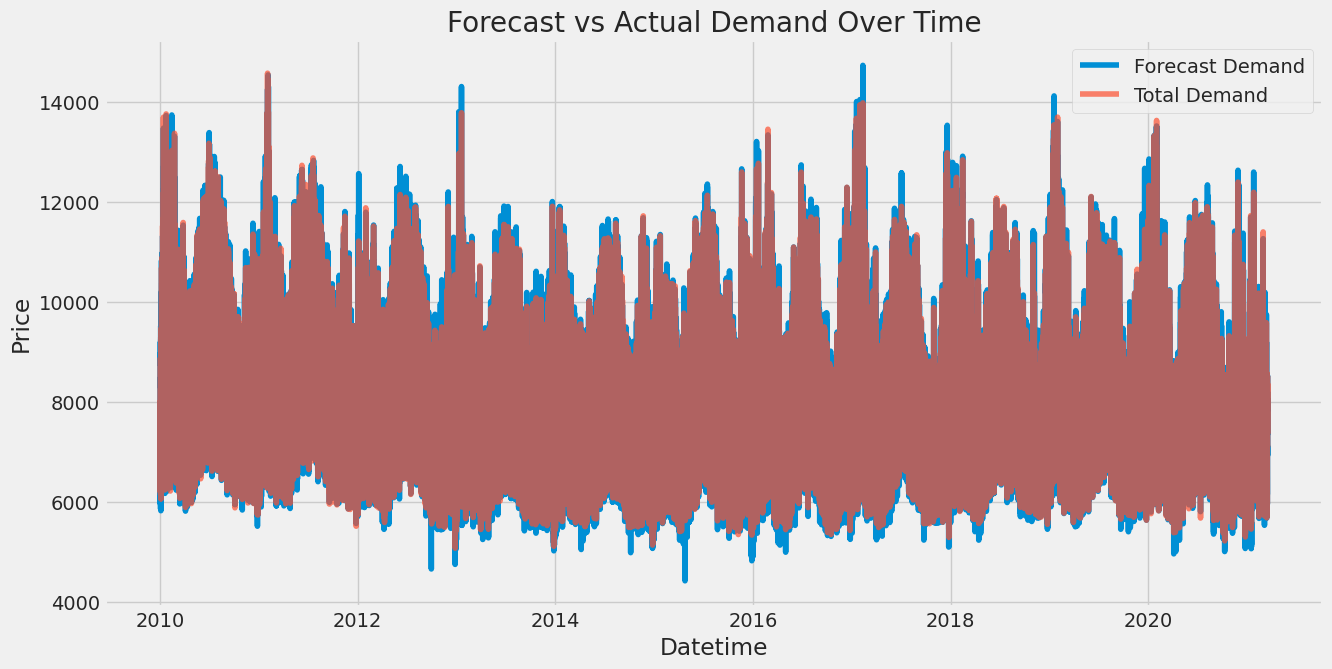

In [5]:
plt.figure(figsize=(CFG.img_dim1, CFG.img_dim2))
plt.plot(nsw_df['DATETIME'], nsw_df['FORECASTDEMAND'], label='Forecast Demand')
plt.plot(nsw_df['DATETIME'], nsw_df['TOTALDEMAND'], label='Total Demand', alpha=0.7)
plt.xlabel('Datetime')
plt.ylabel('Price')
plt.title('Forecast vs Actual Demand Over Time')
plt.legend()
plt.show()

## temperature over time

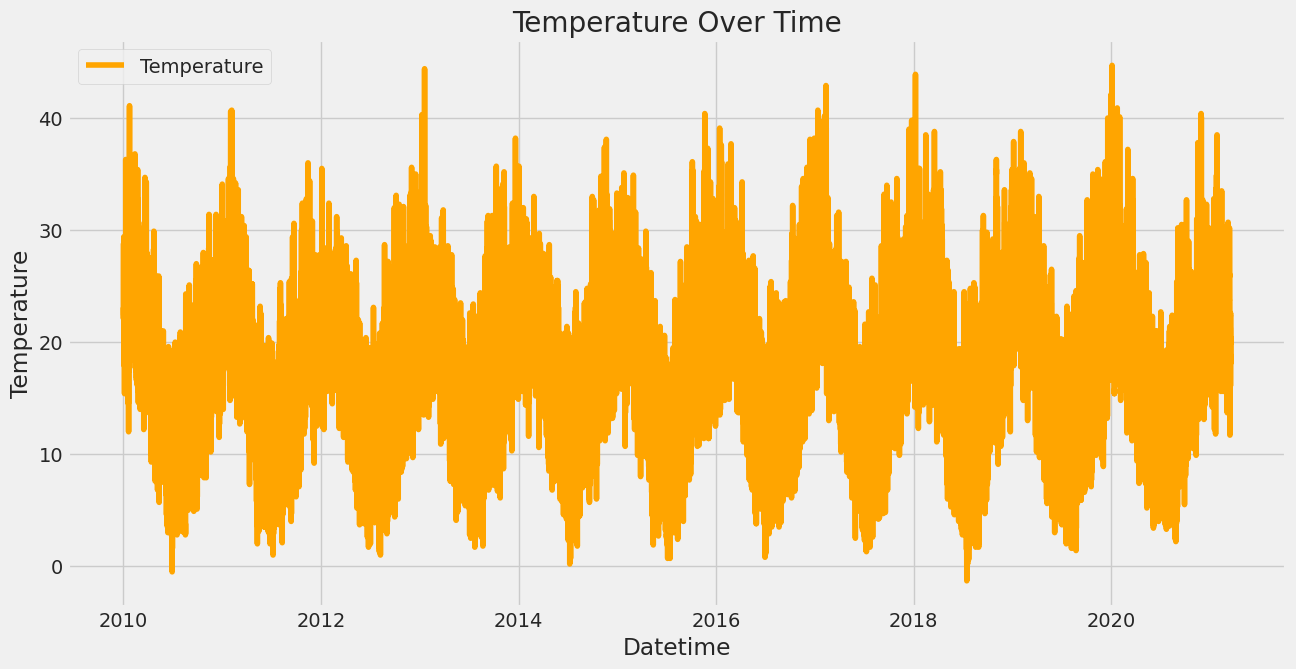

In [6]:
plt.figure(figsize=(CFG.img_dim1, CFG.img_dim2))
plt.plot(nsw_df['DATETIME'], nsw_df['TEMPERATURE'], color='orange', label='Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')
plt.legend()
plt.show()

## 

## Scatter plot of temperature vs. demand

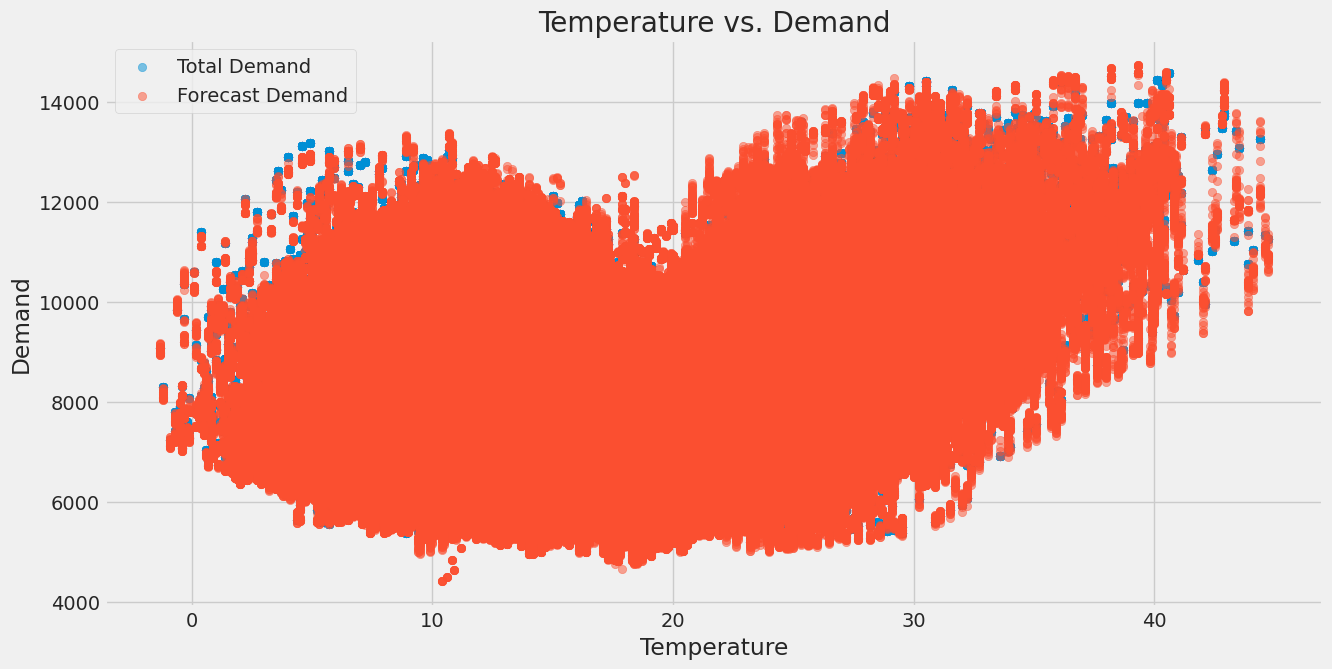

In [7]:
plt.figure(figsize=(CFG.img_dim1, CFG.img_dim2))
plt.scatter(nsw_df['TEMPERATURE'], nsw_df['TOTALDEMAND'], label='Total Demand', alpha=0.5)
plt.scatter(nsw_df['TEMPERATURE'], nsw_df['FORECASTDEMAND'], label='Forecast Demand', alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Demand')
plt.title('Temperature vs. Demand')
plt.legend()
plt.show()

## 

## Distribution of demand and temperature

<Figure size 1400x700 with 0 Axes>

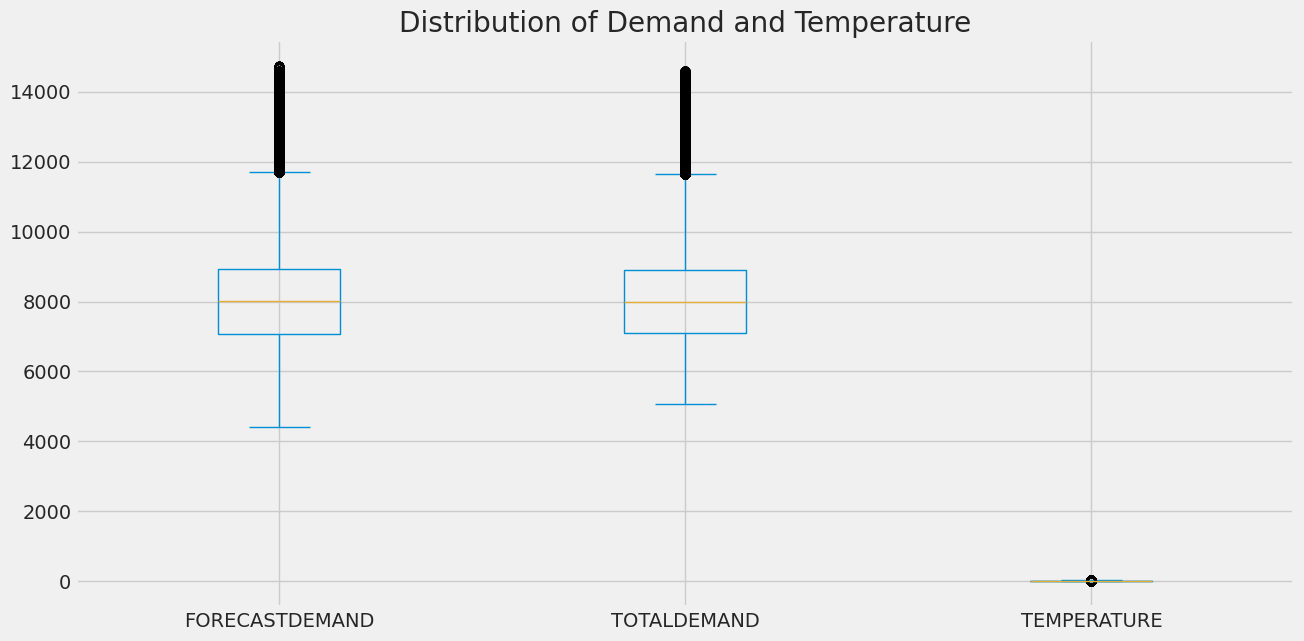

In [8]:
plt.figure(figsize=(CFG.img_dim1, CFG.img_dim2))
nsw_df[['FORECASTDEMAND', 'TOTALDEMAND', 'TEMPERATURE']].plot(kind='box')
plt.title('Distribution of Demand and Temperature')
plt.show()

## Frequency distribution of demand

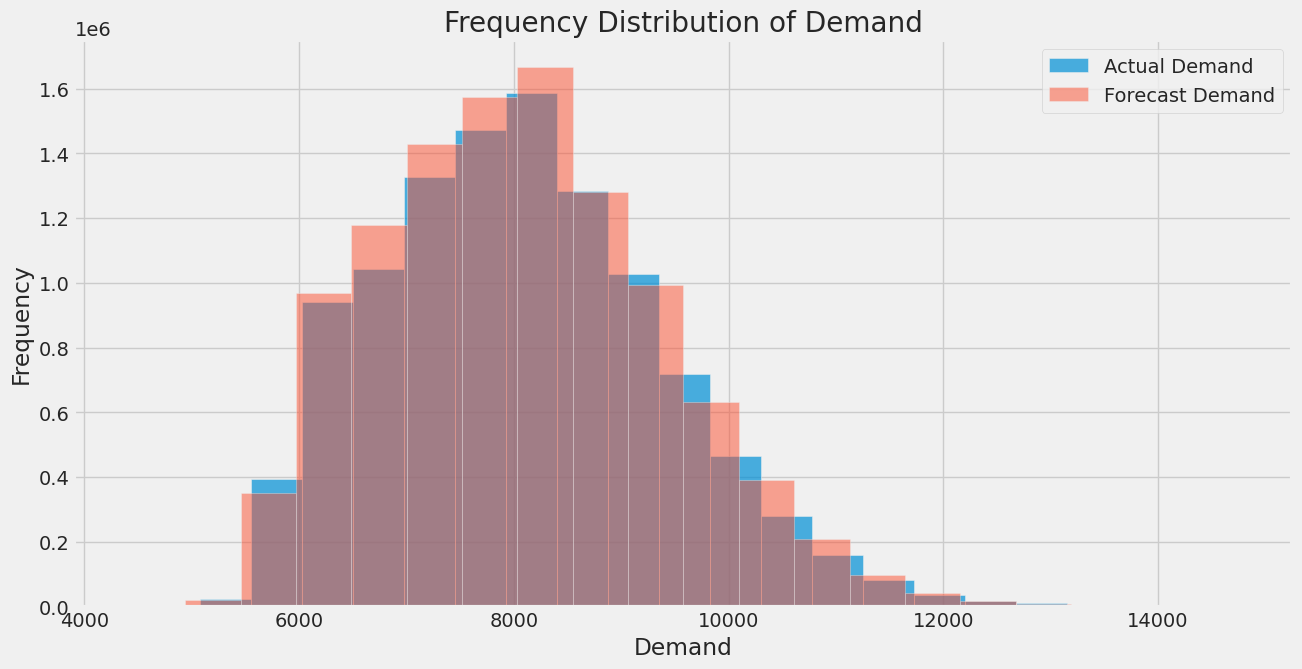

In [9]:
plt.figure(figsize=(CFG.img_dim1, CFG.img_dim2))
nsw_df['TOTALDEMAND'].hist(alpha=0.7, label='Actual Demand', bins=20)
nsw_df['FORECASTDEMAND'].hist(alpha=0.5, label='Forecast Demand', bins=20)
plt.xlabel('Demand')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Demand')
plt.legend()
plt.show()

## Frequency distribution of temperature

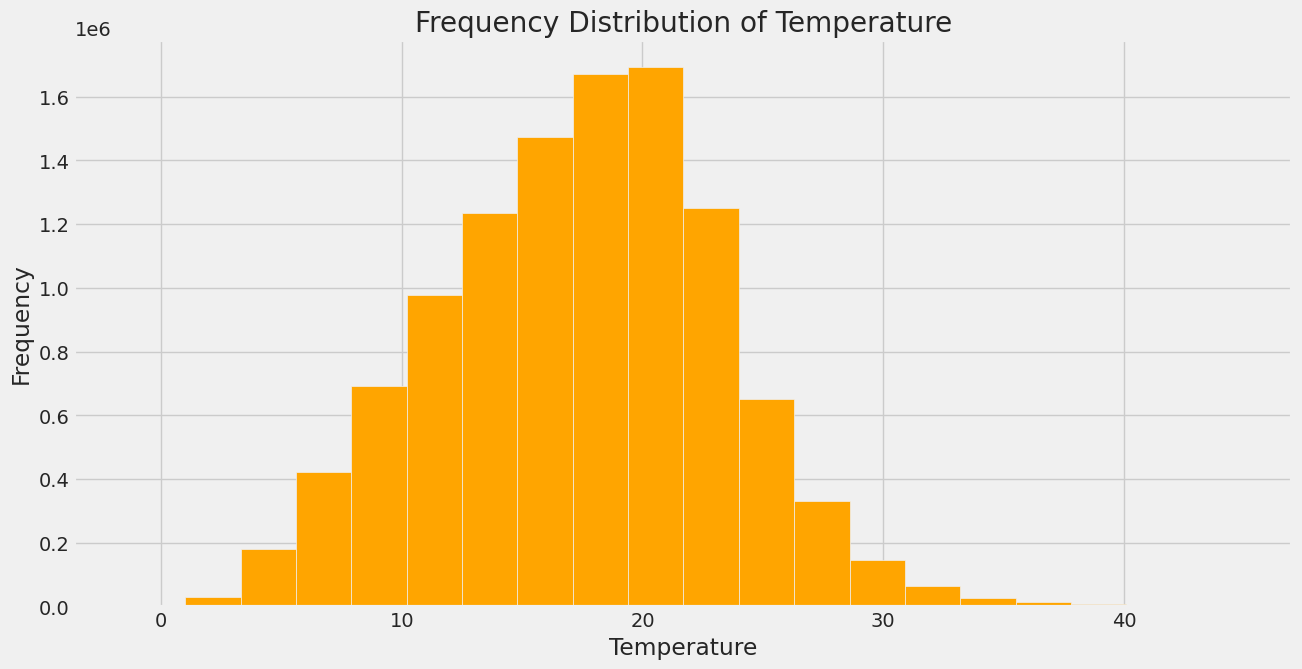

In [10]:
plt.figure(figsize=(CFG.img_dim1, CFG.img_dim2))
nsw_df['TEMPERATURE'].hist(color='orange', bins=20)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Temperature')
plt.show()

## Correlation Heatmap

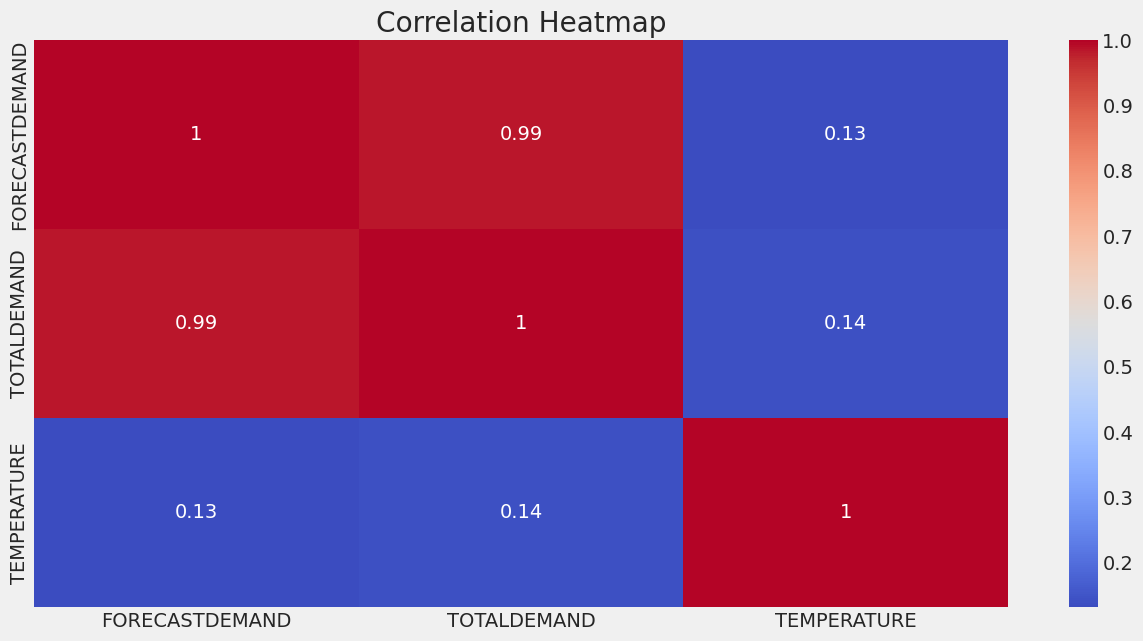

In [11]:
plt.figure(figsize=(CFG.img_dim1, CFG.img_dim2))
sns.heatmap(nsw_df[['FORECASTDEMAND', 'TOTALDEMAND', 'TEMPERATURE']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()